In [1]:
#Qiskit Machine Learning
#A set of tools, algorithms and software for use with IBM QCs to investigate 
#how to use quantum computing to solve machine learning problems.

#Qiskit Aqua: qGAN for Loading Random Distributions
#We have a k-dimensional data sample
#We employ a quantum Generative Adversarial Network (qGAN) 
#to learn the underlying random distribution and 
#to load it into a quantum state:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
start = time.time()
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, execute
from qiskit import BasicAer
from qiskit.visualization import plot_histogram


Bad key "text.kerning_factor" on line 4 in
E:\DevelopmentEnvironments\Anaconda3\envs\qiskit_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


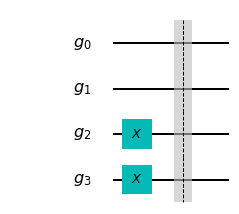

In [2]:
qr_generator = QuantumRegister(4,'g')
qr_discriminator = QuantumRegister(4,'d')
cr_measure = ClassicalRegister(4,'m')
#Create the Generator
circuit_generator = QuantumCircuit(qr_generator)
bit_pattern='0011'
count=0
for bit in bit_pattern:
    if bit=='1':
        circuit_generator.x(count)
    count=count+1
circuit_generator.barrier()    
circuit_generator.draw(output='mpl')

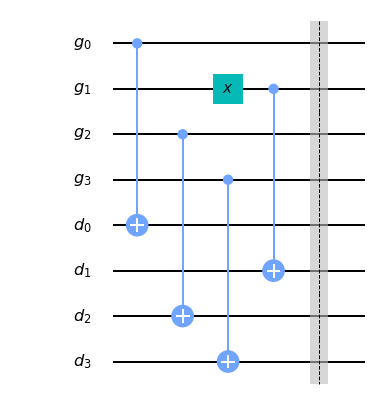

In [3]:
#Create the discriminator
circuit_discriminator = QuantumCircuit(qr_generator,qr_discriminator)
#We want to match a bit-pattern 1011
#0th, 2nd and 3rd qubits are expected to be 1 - so a CX for 0-4, 2-6, 3-7
circuit_discriminator.cx(0,4)
circuit_discriminator.cx(2,6)
circuit_discriminator.cx(3,7)
#1st qubit is expected to be 0 - so a X CX for 1-5
circuit_discriminator.x(1)
circuit_discriminator.cx(1,5)
circuit_discriminator.barrier()
circuit_discriminator.draw('mpl')

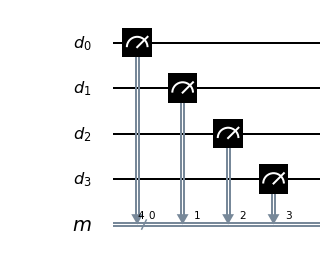

In [4]:
#Create the Measurement Circuit
#The measurement for the correct bit-pattern should be 1111, 100% of the time
circuit_measure = QuantumCircuit(qr_discriminator,cr_measure)
circuit_measure.measure(qr_discriminator,cr_measure)
#circuit_measure.measure([0,1,2,3],[0,1,2,3])
circuit_measure.draw('mpl')

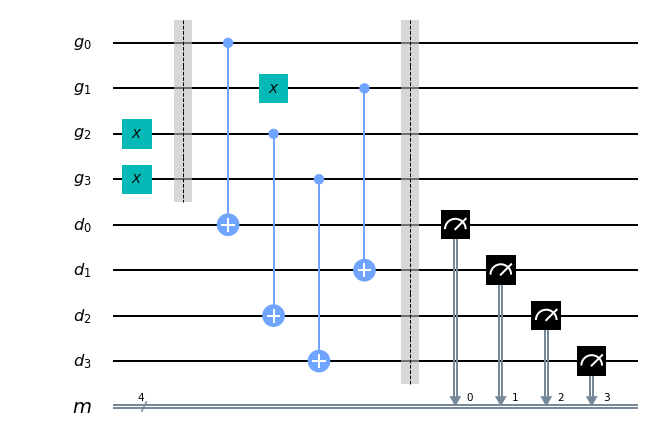

In [5]:
#Add all the circuits
qc = circuit_generator + circuit_discriminator + circuit_measure
#qc.barrier()
#qc = qc + circuit_discriminator
#qc.barrier()
#qc = qc + circuit_measure
qc.draw('mpl')

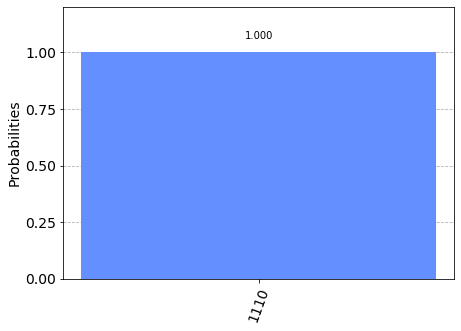

In [6]:
simulator = BasicAer.get_backend('qasm_simulator')
results = execute(qc, backend=simulator, shots=1).result()
plot_histogram(results.get_counts())

In [69]:
list(results.get_counts().keys())[0][::-1]

'0111'